In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
raw = pd.read_stata('integrated_dataset.dta', convert_categoricals = 0)
raw['country'].head()

0    40
1    40
2    40
3    40
4    40
Name: country, dtype: int16

In [65]:
countries = [40,250,276,380,756]
raw = pd.DataFrame(raw.loc[raw.country.isin(countries)])
df = pd.DataFrame(raw[['id_cocas','country','v243_r','v262_r','v263_r','v246_ISCO_2',
                      'v228b_r','v276_r','v226','v239_r','v8','v261','v156','v6','v85',
                      'v86','v87','v88','v89','v90','v91','v92','v93','v94','v95','v31',
                      'v102','v51','v52','v54','v56','v64','v225','pweight']]).copy()

df['conVSpro_manners'] = np.where(df['v85'] < 0, float('NaN'), df['v85'])
df['conVSpro_indipendence'] = np.where(df['v86'] < 0, float('NaN'), df['v86'])
df['conVSpro_hardwork'] = np.where(df['v87'] < 0, float('NaN'), df['v87'])
df['conVSpro_responsibility'] = np.where(df['v88'] < 0, float('NaN'), df['v88'])
df['conVSpro_imagination'] = np.where(df['v89'] < 0, float('NaN'), df['v89'])
df['conVSpro_tolerancerespect'] = np.where(df['v90'] < 0, float('NaN'), df['v90'])
df['conVSpro_thriftsaving'] = np.where(df['v91'] < 0, float('NaN'), df['v91'])
df['conVSpro_determinationperseverance'] = np.where(df['v92'] < 0, float('NaN'), df['v92'])
df['conVSpro_religionsfaith'] = np.where(df['v93'] < 0, float('NaN'), df['v93'])
df['conVSpro_unselfishness'] = np.where(df['v94'] < 0, float('NaN'), df['v94'])
df['conVSpro_obedience'] = np.where(df['v95'] < 0, float('NaN'), df['v95'])

df.isnull().sum()

id_cocas                                 0
country                                  0
v243_r                                   0
v262_r                                   0
v263_r                                   0
v246_ISCO_2                              0
v228b_r                                  0
v276_r                                   0
v226                                     0
v239_r                                   0
v8                                       0
v261                                     0
v156                                     0
v6                                       0
v85                                      0
v86                                      0
v87                                      0
v88                                      0
v89                                      0
v90                                      0
v91                                      0
v92                                      0
v93                                      0
v94        

In [68]:
countries = [40,250,276,380,756]
raw = pd.DataFrame(raw.loc[raw.country.isin(countries)])
df = pd.DataFrame(raw[['id_cocas','country','v243_r','v262_r','v263_r','v246_ISCO_2',
                      'v228b_r','v276_r','v226','v239_r','v8','v261','v156','v6','v85',
                      'v86','v87','v88','v89','v90','v91','v92','v93','v94','v95','v31',
                      'v102','v51','v52','v54','v56','v64','v225','pweight']]).copy()

#education resp v243_r, father v262_r, mother v263_r
df['education_num'] = np.where(df['v243_r'] < 1, float('NaN'), 
                              np.where(df['v243_r'] == 66, float('NaN'),df['v243_r']))
df['education'] = np.where(df['education_num'] == 1, 'a. lower',
                               np.where(df['education_num'] == 2, 'b. medium',
                                        np.where(df['education_num'] == 3, 'c. higher', np.nan)))

#sex resondent v225
df['gender_num'] = np.where(df['v225'] < 1, float('NaN'), df['v225'])
df['gender'] = np.where(df['v225'] == 1, 'male',
                               np.where(df['v225'] == 2, 'female',
                                       np.NaN))

#health professional v246_ISCO_2
df['health_professional_num'] = np.where(df['v246_ISCO_2'] == 22, 1, 0)
df['health_professional'] = np.where(df['v246_ISCO_2'] == 22, 'health professional', 'other')
 
#age v226
df['age_num'] = np.where(df['v226'] < 0, float('NaN'),2018 - df['v226'])
df['age_cl'] = np.where(np.isnan(df['age_num']), float('NaN'),
                        np.where(np.logical_and(df['age_num']>=18, df['age_num']<=24),'a. 18-24',
                                 np.where(np.logical_and(df['age_num']>=25, df['age_num']<=49),'b. 25-49',
                                          np.where(np.logical_and(df['age_num']>=50, df['age_num']<=65),'c. 50-65',
                                                   np.where(df['age_num']> 65,'d. +65','wrong')))))

#country
df['country'] = np.where(df['country'] == 40,'Austria',
                        np.where(df['country'] == 250,'France',
                                np.where(df['country'] == 276,'Germany',
                                         np.where(df['country'] == 380,'Italy',
                                            np.where(df['country'] == 756,'Switzerland',float('NaN'))))))

#urban and rural v276_r 0=rural 1=urban
df['urban_num'] = np.where(df['v276_r'] <= 2,0,1)
df['urban'] = np.where(df['urban_num'] == 1, 'urban',
                               np.where(df['urban_num'] == 0, 'rural',
                                       np.NaN))

#kids v239_r 0=0 1=yes
df['children_num'] = np.where(df['v239_r'] < 0, float('NaN'),
                        np.where(df['v239_r'] == 0,0,
                                 np.where(df['v239_r'] > 0,1,float('NaN'))))
df['children'] = np.where(df['children_num'] == 1, 'one or more',
                               np.where(df['children_num'] == 0, 'no children',
                                       np.NaN))


#state of healht v8 (1-very good, 5-very poor)
df['state_of_health_num'] = np.where(df['v8'] < 0, float('NaN'), df['v8'])
df['state_of_health'] = np.where(df['state_of_health_num'] == 1, 'a. very good',
                               np.where(df['state_of_health_num'] == 2, 'b. good',
                                        np.where(df['state_of_health_num'] == 3, 'c. fair',
                                                 np.where(df['state_of_health_num'] == 4, 'e. poor',
                                                          np.where(df['state_of_health_num'] == 5, 'f. very poor',
                                                                   np.NaN)))))

#houshold net income v261 (1-1st decile, 10-10th decile)
df['income_num'] = np.where(df['v261'] < 0, float('NaN'), df['v261'])
df['income'] = np.where(df['income_num'] < 0, float('NaN'),
                        np.where(np.logical_and(df['income_num']>=1, df['income_num']<=3),'a. buttom 30%',
                                 np.where(np.logical_and(df['income_num']>=4, df['income_num']<=7),'b. mid 40%',
                                          np.where(df['income_num']>=8,'c. top 30%','wrong'))))


#target variable justify euthanasia v156 (1-never, 10-always)
df['justify_euthanasia_num'] = np.where(df['v156'] < 0, np.nan, df['v156'])
df['justify_euthanasia_num'] = np.where(pd.isna(df['justify_euthanasia_num']),round(df.groupby(['country','urban','age_cl','education'])['justify_euthanasia_num'].transform(lambda x: x.fillna(x.quantile(.5))),0),df['justify_euthanasia_num'])
df['justify_euthanasia_cl'] = np.where(df['justify_euthanasia_num'] <= 4,'not in favor',
                                      np.where(df['justify_euthanasia_num'] == 5,'undecided',
                                              np.where(df['justify_euthanasia_num'] >= 5,'in favor','NaN')))

#religion
##how important in your live: religion v6 (1 very important, 2 quite important,3 not important,4 not at all important)
df['importance_of_religion_num'] = np.where(df['v6'] < 0, float('NaN'), df['v6'])
df['importance_of_religion_num'] = np.where(pd.isna(df['importance_of_religion_num']),round(df.groupby(['country','urban','age_cl','education'])['importance_of_religion_num'].transform(lambda x: x.fillna(x.quantile(.5))),0),df['importance_of_religion_num'])
df['importance_of_religion'] = np.where(df['importance_of_religion_num'] == 1,'very important',
                                      np.where(df['importance_of_religion_num'] == 2,'quite important',
                                              np.where(df['importance_of_religion_num'] == 3,'not important',
                                                       np.where(df['importance_of_religion_num'] == 4,'not at all important', 'Unknown'))))
##do you belong to a religious denomination (1yes, 2no)
df['rel_denomination_binary_num'] = np.where(df['v51'] < 0, float('NaN'), df['v51'])
##harmonized religious denomination
df['rel_denomination'] = np.where(df['v52'] == 1, 'Roman catholic',
                                    np.where(df['v52'] == 2, 'Protestant',
                                                np.where(df['v52'] == 3, 'Other Christians',
                                                        np.where(df['v52'] == 4, 'Other',
                                                                    np.where(df['v52'] == 5, 'Muslim',
                                                                                np.where(df['v52'] == 6, 'Other',
                                                                                        np.where(df['v52'] == 7, 'Other',
                                                                                                np.where(df['v52'] == 8, 'Other Christians',
                                                                                                         np.where(df['rel_denomination_binary_num'] == 2,'None',
                                                                                                                  np.where(df['v52'] == 9, 'Other', 'Unknown'))))))))))
df['rel_denomination_binary_num'] = np.where(df['rel_denomination'] != 'None',2,
                                             np.where(df['rel_denomination'] == 'None',1, np.NaN))
df['rel_denomination_binary'] = np.where(df['rel_denomination_binary_num'] == 2, 'no',
                                             np.where(df['rel_denomination_binary_num'] == 1, 'yes', np.NaN))
##how often attend religious services v54
                                                                                                         
###1 more than once a week, 2 once a week, 3 once a month,
###4 only on specific holy days, 5 once a year, 6 less often, 7 practically never                                                                                                   
df['rel_attend_rel_services'] = np.where(df['v54'] < 0, float('NaN'), df['v54'])
df['rel_attend_rel_services'] = np.where(np.isnan(df['rel_attend_rel_services']),round(df.groupby(['country','urban','age_cl','education'])['rel_attend_rel_services'].transform(lambda x: x.fillna(x.quantile(.5))),0),df['rel_attend_rel_services'])
###1 a religious person,2 not a relgious person,3 a convinced atheist
df['religious_person_num'] = np.where(df['v56'] < 0, float('NaN'), df['v56'])
df['religious_person_num'] = np.where(np.isnan(df['religious_person_num']),round(df.groupby(['country','urban','age_cl','education'])['religious_person_num'].transform(lambda x: x.fillna(x.quantile(.5))),0),df['religious_person_num'])
df['religious_person'] = np.where(df['religious_person_num'] == 1,'a. religious person',
                                  np.where(df['religious_person_num'] == 2,'b. not areligious person',
                                           np.where(df['religious_person_num'] == 3,'c. a convinced atheist',np.NaN)))
##how often do you pray outside of religious services v64
### 1 every day,2 more than once week,3 at least once a week,4 at least once a month
### 5 several times a year,6 less often,7 never
df['rel_pray_oustide_rel_services'] = np.where(df['v64'] < 0, float('NaN'), df['v64'])
df['rel_pray_oustide_rel_services'] = np.where(np.isnan(df['rel_pray_oustide_rel_services']),round(df.groupby(['country','urban','age_cl','education'])['rel_pray_oustide_rel_services'].transform(lambda x: x.fillna(x.quantile(.5))),0),df['rel_pray_oustide_rel_services'])

#conservative vs progressiv 1 mentioned 2 not mentioned
df['conVSpro_manners'] = np.where(df['v85'] < 0, float('NaN'), df['v85'])
df['conVSpro_manners'] = np.where(np.isnan(df['conVSpro_manners']),round(df.groupby(['country','urban','age_cl','education'])['conVSpro_manners'].transform(lambda x: x.fillna(x.quantile(.5))),0),df['conVSpro_manners'])
df['conVSpro_indipendence'] = np.where(df['v86'] < 0, float('NaN'), df['v86'])
df['conVSpro_indipendence'] = np.where(np.isnan(df['conVSpro_indipendence']),round(df.groupby(['country','urban','age_cl','education'])['conVSpro_indipendence'].transform(lambda x: x.fillna(x.quantile(.5))),0),df['conVSpro_indipendence'])
df['conVSpro_hardwork'] = np.where(df['v87'] < 0, float('NaN'), df['v87'])
df['conVSpro_hardwork'] = np.where(np.isnan(df['conVSpro_hardwork']),round(df.groupby(['country','urban','age_cl','education'])['conVSpro_hardwork'].transform(lambda x: x.fillna(x.quantile(.5))),0),df['conVSpro_hardwork'])
df['conVSpro_responsibility'] = np.where(df['v88'] < 0, float('NaN'), df['v88'])
df['conVSpro_responsibility'] = np.where(np.isnan(df['conVSpro_responsibility']),round(df.groupby(['country','urban','age_cl','education'])['conVSpro_responsibility'].transform(lambda x: x.fillna(x.quantile(.5))),0),df['conVSpro_responsibility'])
df['conVSpro_imagination'] = np.where(df['v89'] < 0, float('NaN'), df['v89'])
df['conVSpro_imagination'] = np.where(np.isnan(df['conVSpro_imagination']),round(df.groupby(['country','urban','age_cl','education'])['conVSpro_imagination'].transform(lambda x: x.fillna(x.quantile(.5))),0),df['conVSpro_imagination'])
df['conVSpro_tolerancerespect'] = np.where(df['v90'] < 0, float('NaN'), df['v90'])
df['conVSpro_tolerancerespect'] = np.where(np.isnan(df['conVSpro_tolerancerespect']),round(df.groupby(['country','urban','age_cl','education'])['conVSpro_tolerancerespect'].transform(lambda x: x.fillna(x.quantile(.5))),0),df['conVSpro_tolerancerespect'])
df['conVSpro_thriftsaving'] = np.where(df['v91'] < 0, float('NaN'), df['v91'])
df['conVSpro_thriftsaving'] = np.where(np.isnan(df['conVSpro_thriftsaving']),round(df.groupby(['country','urban','age_cl','education'])['conVSpro_thriftsaving'].transform(lambda x: x.fillna(x.quantile(.5))),0),df['conVSpro_thriftsaving'])
df['conVSpro_determinationperseverance'] = np.where(df['v92'] < 0, float('NaN'), df['v92'])
df['conVSpro_determinationperseverance'] = np.where(np.isnan(df['conVSpro_determinationperseverance']),round(df.groupby(['country','urban','age_cl','education'])['conVSpro_determinationperseverance'].transform(lambda x: x.fillna(x.quantile(.5))),0),df['conVSpro_determinationperseverance'])
df['conVSpro_religionsfaith'] = np.where(df['v93'] < 0, float('NaN'), df['v93'])
df['conVSpro_religionsfaith'] = np.where(np.isnan(df['conVSpro_religionsfaith']),round(df.groupby(['country','urban','age_cl','education'])['conVSpro_religionsfaith'].transform(lambda x: x.fillna(x.quantile(.5))),0),df['conVSpro_religionsfaith'])
df['conVSpro_unselfishness'] = np.where(df['v94'] < 0, float('NaN'), df['v94'])
df['conVSpro_unselfishness'] = np.where(np.isnan(df['conVSpro_unselfishness']),round(df.groupby(['country','urban','age_cl','education'])['conVSpro_unselfishness'].transform(lambda x: x.fillna(x.quantile(.5))),0),df['conVSpro_unselfishness'])
df['conVSpro_obedience'] = np.where(df['v95'] < 0, float('NaN'), df['v95'])
df['conVSpro_obedience'] = np.where(np.isnan(df['conVSpro_obedience']),round(df.groupby(['country','urban','age_cl','education'])['conVSpro_obedience'].transform(lambda x: x.fillna(x.quantile(.5))),0),df['conVSpro_obedience'])
#people can be trusted v31 (1 most people can be trusted, 2 can not be too careful)
df['trust_num'] = np.where(df['v31'] < 0, np.NaN, df['v31'])
df['trust_num'] = np.where(np.isnan(df['trust_num']),round(df.groupby(['country','urban','age_cl','education'])['trust_num'].transform(lambda x: x.fillna(x.quantile(.5))),0),df['trust_num'])
df['trust'] = np.where(df['trust_num'] == 1, 'most people can be trusted', 
                       np.where(df['trust_num'] == 2, 'can not be too careful', np.NaN))

#political view v102 (1 very left, 10 very right)
df['leftVSright'] = np.where(df['v102'] < 0, np.NaN, df['v102'])
df['leftVSright'] = np.where(np.isnan(df['leftVSright']),round(df.groupby(['country','urban','age_cl','education'])['leftVSright'].transform(lambda x: x.fillna(x.quantile(.5))),0),df['leftVSright'])

df.columns
df.isnull().sum()

id_cocas                                 0
country                                  0
v243_r                                   0
v262_r                                   0
v263_r                                   0
v246_ISCO_2                              0
v228b_r                                  0
v276_r                                   0
v226                                     0
v239_r                                   0
v8                                       0
v261                                     0
v156                                     0
v6                                       0
v85                                      0
v86                                      0
v87                                      0
v88                                      0
v89                                      0
v90                                      0
v91                                      0
v92                                      0
v93                                      0
v94        

In [69]:
df_working = pd.DataFrame(df[['id_cocas', 'country',
       'pweight', 'education_num', 'education', 'gender_num', 'gender',
       'health_professional_num', 'health_professional', 'age_num', 'age_cl',
       'urban_num', 'urban', 'children_num', 'children', 'state_of_health_num',
       'state_of_health', 'income_num', 'income', 'justify_euthanasia_num',
       'justify_euthanasia_cl', 'importance_of_religion_num',
       'importance_of_religion', 'rel_denomination_binary_num',
       'rel_denomination', 'rel_denomination_binary',
       'rel_attend_rel_services', 'religious_person_num', 'religious_person',
       'rel_pray_oustide_rel_services', 'conVSpro_manners',
       'conVSpro_indipendence', 'conVSpro_hardwork', 'conVSpro_responsibility',
       'conVSpro_imagination', 'conVSpro_tolerancerespect',
       'conVSpro_thriftsaving', 'conVSpro_determinationperseverance',
       'conVSpro_religionsfaith', 'conVSpro_unselfishness',
       'conVSpro_obedience', 'trust_num', 'trust', 'leftVSright']]).reset_index(drop=1)


df_working.isnull().sum()
before = len(df_working)
df_working = df_working.dropna().reset_index(drop=1)
after = len(df_working)
print('before: ',before,' after:', after, ' diff:', before - after)

#df_working[df_working.income == 'nan'][['income_num','income']]

before:  14858  after: 12560  diff: 2298


In [42]:
df_working['education'].unique()

array(['b. medium', 'c. higher', 'a. lower'], dtype=object)

In [43]:
df_working[['justify_euthanasia_num','country']]

,justify_euthanasia_num,country
0,5.0,Austria
2,2.0,Austria
3,7.0,Austria
4,9.0,Austria
5,10.0,Austria
6,9.0,Austria
10,5.0,Austria
11,8.0,Austria
13,5.0,Austria
16,6.0,Austria


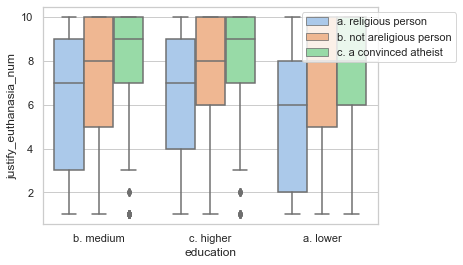

In [586]:
sns.set(style="whitegrid")
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
d = df_working

#ax = ax.set_title('Attitude towards euthanasia by country')
ax = sns.boxplot(y='justify_euthanasia_num', x='education', hue='religious_person', data=d, palette="pastel")
ax = ax.legend(loc=1, bbox_to_anchor=(1.25,1))


NameError: name 'handles' is not defined

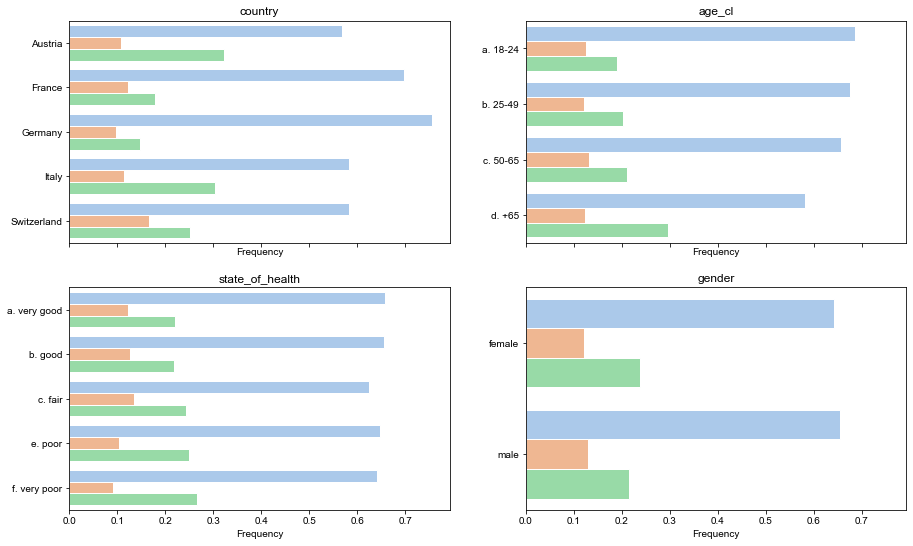

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 9),sharex=True)

sns.set(style="whitegrid")
d = df_working

d['frequency'] = 0 # a dummy column to refer to
for col, ax in zip(['country', 'age_cl','state_of_health','gender'], axes.flatten()):
    counts = d.groupby([col, 'justify_euthanasia_cl']).count()
    freq_per_group = counts.div(counts.groupby(col).transform('sum')).reset_index()
    sns.barplot(y=col, x='frequency', hue='justify_euthanasia_cl', data=freq_per_group, ax=ax, palette="pastel", hue_order = ['pro', 'undecided', 'against'],errwidth=.5)
    #ax.legend(handles, labels, loc='lower right', ncol=3, bbox_to_anchor=(1.25,1))
    ax.set(title = col, xlabel='Frequency', ylabel='')
    ax.legend_.remove()
ax.legend(handles, labels, ncol=3, bbox_to_anchor=(0.15, 1.13))

fig.suptitle('Attitude towards Euthanasia by socio demographic variables I', fontsize=24)
#handles, labels = ax.get_legend_handles_labels()
#ax.legend_.remove()
#fig.legend(handles, labels, loc='upper center', ncol=3)
    

Text(0.5, 0.98, 'Attitude towards Euthanasia by socio demographic variables II')

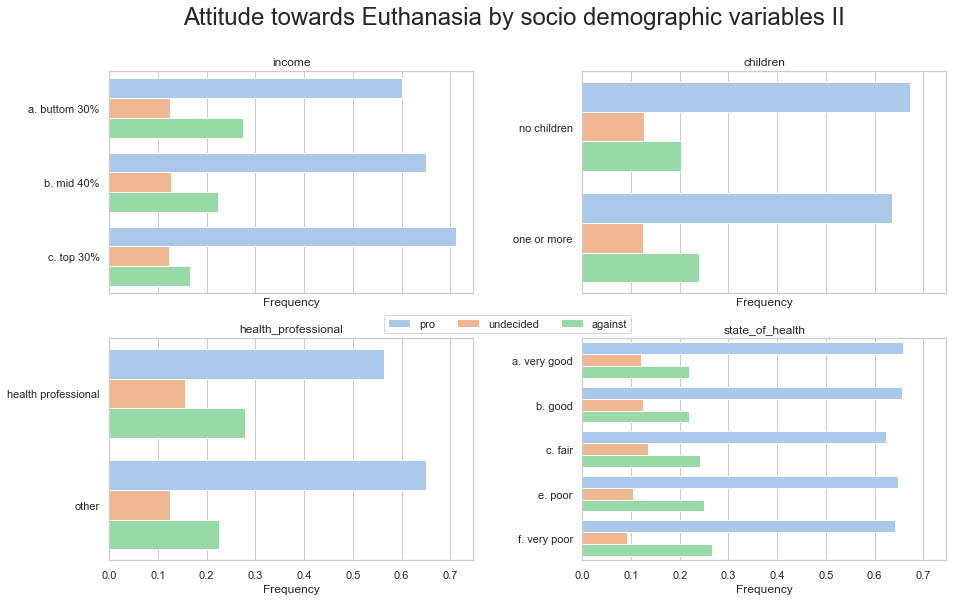

In [588]:
fig, axes = plt.subplots(2, 2, figsize=(15, 9),sharex=True)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

sns.set(style="whitegrid")
d = df_working

d['frequency'] = 0 # a dummy column to refer to
for col, ax in zip(['income', 'children','health_professional','state_of_health'], axes.flatten()):
    counts = d.groupby([col, 'justify_euthanasia_cl']).count()
    freq_per_group = counts.div(counts.groupby(col).transform('sum')).reset_index()
    sns.barplot(y=col, x='frequency', hue='justify_euthanasia_cl', data=freq_per_group, ax=ax, palette="pastel", hue_order = ['pro', 'undecided', 'against'],errwidth=.5)
    #ax.legend(handles, labels, loc='lower right', ncol=3, bbox_to_anchor=(1.25,1))
    ax.set(title = col, xlabel='Frequency', ylabel='')
    ax.legend_.remove()
ax.legend(handles, labels, ncol=3, bbox_to_anchor=(0.15, 1.13))

fig.suptitle('Attitude towards Euthanasia by socio demographic variables II', fontsize=24)
#handles, labels = ax.get_legend_handles_labels()
#ax.legend_.remove()
#fig.legend(handles, labels, loc='upper center', ncol=3)
    

NameError: name 'handles' is not defined

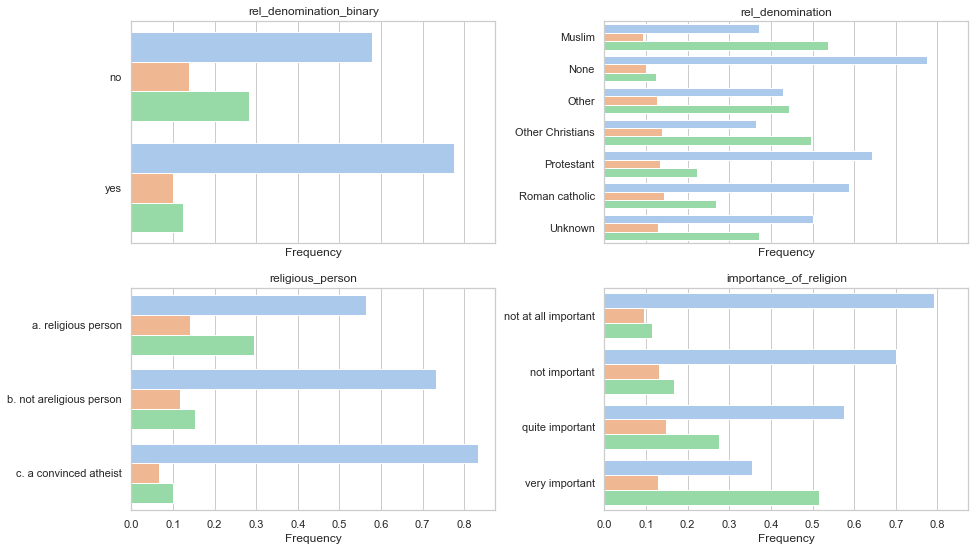

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 9),sharex=True)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

sns.set(style="whitegrid")
d = df_working

d['frequency'] = 0 # a dummy column to refer to
for col, ax in zip(['rel_denomination_binary', 'rel_denomination','religious_person','importance_of_religion'], axes.flatten()):
    counts = d.groupby([col, 'justify_euthanasia_cl']).count()
    freq_per_group = counts.div(counts.groupby(col).transform('sum')).reset_index()
    sns.barplot(y=col, x='frequency', hue='justify_euthanasia_cl', data=freq_per_group, ax=ax, palette="pastel", hue_order = ['pro', 'undecided', 'against'],errwidth=.5)
    #ax.legend(handles, labels, loc='lower right', ncol=3, bbox_to_anchor=(1.25,1))
    ax.set(title = col, xlabel='Frequency', ylabel='')
    ax.legend_.remove()
ax.legend(handles, labels, ncol=3, bbox_to_anchor=(0.15, 1.13))

fig.suptitle('Attitude towards Euthanasia by socio demographic variables II', fontsize=24)
#handles, labels = ax.get_legend_handles_labels()
#ax.legend_.remove()
#fig.legend(handles, labels, loc='upper center', ncol=3)

In [70]:
df_pca = pd.DataFrame(df_working[['conVSpro_indipendence', 'conVSpro_hardwork', 'conVSpro_responsibility',
       'conVSpro_imagination', 'conVSpro_tolerancerespect',
       'conVSpro_thriftsaving', 'conVSpro_determinationperseverance',
       'conVSpro_religionsfaith', 'conVSpro_unselfishness',
       'conVSpro_obedience']]).copy().reset_index(drop=1)

features = df_pca.loc[:, df_pca.columns.isin(['conVSpro_indipendence', 'conVSpro_hardwork', 'conVSpro_responsibility',
       'conVSpro_imagination', 'conVSpro_tolerancerespect',
       'conVSpro_thriftsaving', 'conVSpro_determinationperseverance',
       'conVSpro_religionsfaith', 'conVSpro_unselfishness',
       'conVSpro_obedience'])].columns.tolist()

# Separating out the features
x = df_working.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

Text(0, 0.5, 'cumulative explained variance')

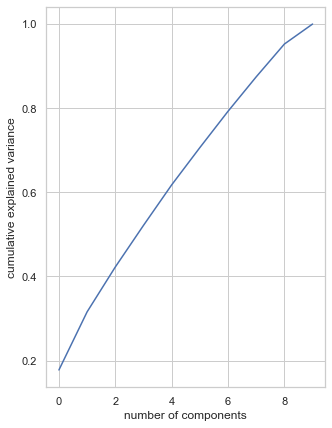

In [79]:
f, ax = plt.subplots(figsize=(5, 7))
random.seed(9001)

pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [96]:
comps = 5
random.seed(9001)
comps_list = list()
for i in range(comps): comps_list.append('pc'+str(i+1))

pca = PCA(n_components=comps)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = comps_list).reset_index(drop=1)
df_pca = pd.concat([df_pca.loc[:, features],principalDf], axis = 1)


# interpret the PCs
corr = df_pca.corr()
col_is_pc = corr.index.str.contains('^pc\d$')
corr = corr[col_is_pc][corr.columns.drop(list(corr.filter(regex='^pc\d$')))]

corr.transpose()[['pc3']].sort_values(by='pc3', ascending=False)
#pc1 = independence and responsibility
#pc2 = thrift and hard work
#pc3 = religious faith
#pc4 = determination and responsibility
#pc5 = tolerance and unselfishness

,pc3
conVSpro_religionsfaith,0.533781
conVSpro_tolerancerespect,0.337834
conVSpro_responsibility,0.299462
conVSpro_obedience,0.226858
conVSpro_unselfishness,0.121736
conVSpro_indipendence,-0.083751
conVSpro_thriftsaving,-0.223025
conVSpro_imagination,-0.290629
conVSpro_determinationperseverance,-0.364636
conVSpro_hardwork,-0.486629


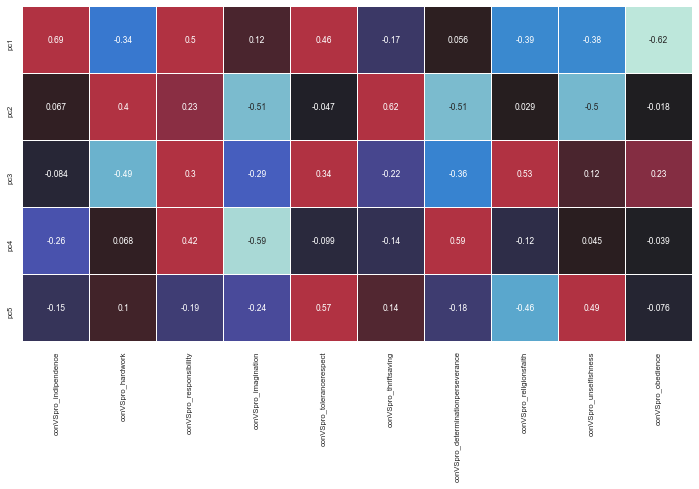

In [94]:
sns.set(style="white", font_scale=0.7)

# Generate a large random dataset
# Generate corr data
d = corr

# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(d, vmax=.3, center=0,square=True, linewidths=.5, annot=True, cbar=False)
#sns.pairplot(d)


No handles with labels found to put in legend.


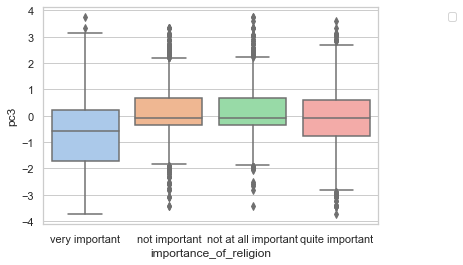

In [97]:
sns.set(style="whitegrid")
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
d = df_pca = pd.concat([df_working,principalDf], axis = 1).reset_index(drop=1)

#ax = ax.set_title('Attitude towards euthanasia by country')
ax = sns.boxplot(y='pc3', x='importance_of_religion', data=d, palette="pastel")
ax = ax.legend(loc=1, bbox_to_anchor=(1.25,1))